In [1]:
#library
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt

In [2]:
#read data
df = pd.read_csv('data06_iris.csv')

In [75]:
#read data
df = pd.read_csv('data01_iris.csv')
X = df.iloc[:,:-1]
Y = df['Species']

In [76]:
X.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [77]:
Y.head()

0    setosa
1    setosa
2    setosa
3    setosa
4    setosa
Name: Species, dtype: object

In [78]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X,Y,test_size=0.4,random_state=0) 

In [79]:
xtrain.shape

(90, 4)

In [80]:
f = LinearDiscriminantAnalysis()
f.fit(xtrain,ytrain)
yhat_train = f.predict(xtrain)
yhat_train_prob = f.predict_proba(xtrain)
yhat_test = f.predict(xtest)
yhat_test_prob = f.predict_proba(xtest)

In [83]:
from sklearn.model_selection import KFold
kf = KFold(5)
kf.get_n_splits()
from sklearn.model_selection import cross_val_score
f = LinearDiscriminantAnalysis()
s = cross_val_score(f,xtrain,ytrain,cv=5)

In [88]:
#simple code
f = LinearDiscriminantAnalysis()
f.fit(xtrain,ytrain)
f.score(xtrain,ytrain)
s = cross_val_score(f,xtrain,ytrain, cv=5)
s.mean() #5-fold CV score
f.score(xtest,ytest) # test score
print(f.score(xtrain,ytrain), s.mean(), f.score(xtest,ytest))

0.9888888888888889 0.9875 0.95


In [84]:
s

array([1.    , 1.    , 1.    , 1.    , 0.9375])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


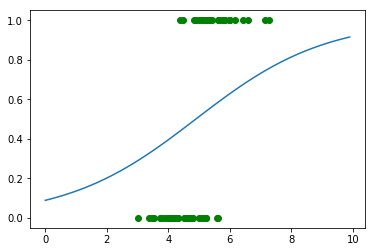

In [7]:
###########################################################
# logistic regression
###########################################################

from sklearn.linear_model import LogisticRegression

# simple logistic regression
f = LogisticRegression()
f.fit(xtrain[['Petal.Length']],ytrain)
f.coef_
f.intercept_
x = np.arange(0,10,step=0.1)
x = x.reshape((len(x),1))
yhat_prob = f.predict_proba(x)
yhat = f.predict(x)

plt.plot(xtrain[['Petal.Length']],ytrain,'go')
plt.plot(x[:,0],yhat_prob[:,1])
plt.show()

In [9]:
f.predict([[1],[3],[5],[7]])

array([0, 0, 1, 1], dtype=int64)

In [10]:
f.predict_proba([[1],[3],[5],[7]])

array([[0.86417267, 0.13582733],
       [0.71102287, 0.28897713],
       [0.48758404, 0.51241596],
       [0.2689994 , 0.7310006 ]])

In [13]:
f = LogisticRegression()
f.fit(xtrain,ytrain)
yhat_train = f.predict(xtrain)
yhat_train_prob = f.predict_proba(xtrain)
yhat_test = f.predict(xtest)
yhat_test_prob = f.predict_proba(xtest)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [15]:
pd.crosstab(ytrain,yhat_train)

col_0,0,1
Species,,
0,27,5
1,6,22


In [16]:
pd.crosstab(ytest,yhat_test)

col_0,0,1
Species,,
0,9,9
1,4,18


In [17]:
f.score(xtrain,ytrain) #R2 accuracy

0.8166666666666667

In [18]:
f.score(xtest, ytest)

0.675

In [19]:
#Logistic Regression의 핵심코드
f = LogisticRegression()
f.fit(xtrain,ytrain)
yhat = f.predict(xtest)
yhat_prob = f.predict_proba(xtest)
f.score(xtest,ytest)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.675

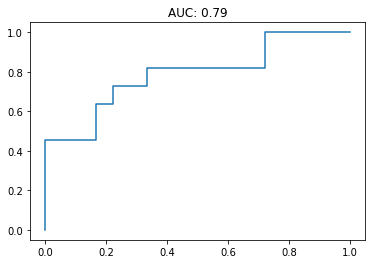

In [20]:
# roc curve
from sklearn.metrics import roc_curve, roc_auc_score
fpr,tpr,th = roc_curve(ytest,yhat_test_prob[:,1])

auc = roc_auc_score(ytest,yhat_test_prob[:,1])

plt.plot(fpr,tpr)
plt.title('AUC: %.2f' % auc)
plt.show()

In [21]:
?LogisticRegression

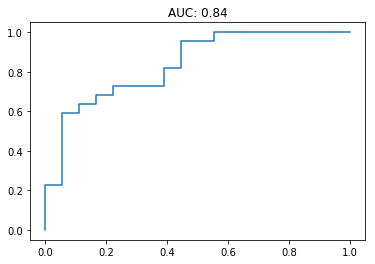

In [22]:
###########################################################
# linear discriminant analysis
###########################################################

# linear discriminant analysis: 2D
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# full model
f = LinearDiscriminantAnalysis()
f.fit(xtrain,ytrain)
yhat_train = f.predict(xtrain)
yhat_train_prob = f.predict_proba(xtrain)
yhat_test = f.predict(xtest)
yhat_test_prob = f.predict_proba(xtest)
f.score(xtrain,ytrain)
f.score(xtest,ytest)

# roc
fpr,tpr,th = roc_curve(ytest,yhat_test_prob[:,1])
auc = roc_auc_score(ytest,yhat_test_prob[:,1])
plt.plot(fpr,tpr)
plt.title('AUC: %.2f' % auc)
plt.show()

In [23]:
f.score(xtrain,ytrain)

0.9166666666666666

In [24]:
f.score(xtest,ytest)

0.75

In [29]:
set(xtrain)

{'Petal.Length', 'Petal.Width', 'Sepal.Length', 'Sepal.Width'}

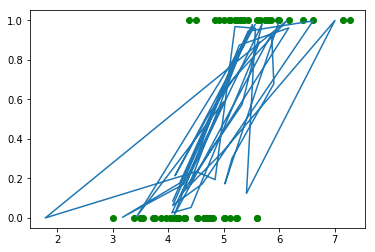

In [34]:
plt.plot(xtrain[['Petal.Length']],ytrain,'go')
plt.plot(xtest[['Petal.Length']],yhat_test_prob[:,1])
plt.show()

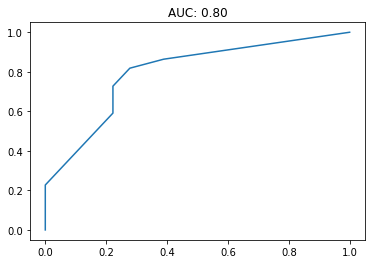

In [35]:
from sklearn.neighbors import KNeighborsClassifier

f = KNeighborsClassifier(5)
f.fit(xtrain,ytrain)
yhat_test = f.predict(xtest)
yhat_test_prob = f.predict_proba(xtest)
f.score(xtrain,ytrain)
f.score(xtest,ytest)

# roc
fpr,tpr,th = roc_curve(ytest,yhat_test_prob[:,1])
auc = roc_auc_score(ytest,yhat_test_prob[:,1])
plt.plot(fpr,tpr)
plt.title('AUC: %.2f' % auc)
plt.show()

In [36]:
f.score(xtrain,ytrain)

0.9333333333333333

In [37]:
f.score(xtest,ytest)

0.75

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


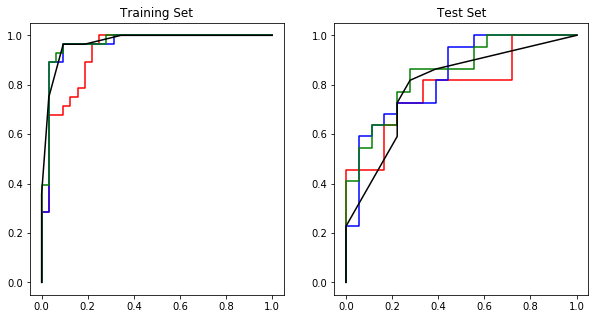

In [39]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import roc_curve, roc_auc_score

classifier_names = ['logistic','lda','qda','knn']
classifiers = [
        LogisticRegression(),
        LinearDiscriminantAnalysis(),
        QuadraticDiscriminantAnalysis(),
        KNeighborsClassifier(5)]

col = ['r','b','g','k']
fig,ax = plt.subplots(1,2,figsize=(10,5))

err = np.zeros((4,2))
auc = np.zeros((4,2))
for i in range(len(classifiers)):
    f = classifiers[i].fit(xtrain,ytrain)
    yhat_train_prob = f.predict_proba(xtrain)
    yhat_test_prob = f.predict_proba(xtest)
    err[i,0] = f.score(xtrain,ytrain)
    err[i,1] = f.score(xtest,ytest)
    auc[i,0] = roc_auc_score(ytrain,yhat_train_prob[:,1])
    auc[i,1] = roc_auc_score(ytest,yhat_test_prob[:,1])
    fpr,tpr,th = roc_curve(ytrain,yhat_train_prob[:,1])
    ax[0].plot(fpr,tpr,col[i])    
    fpr,tpr,th = roc_curve(ytest,yhat_test_prob[:,1])
    ax[1].plot(fpr,tpr,col[i])
    
ax[0].set_title('Training Set')
ax[1].set_title('Test Set')
plt.show()


In [40]:
df = pd.read_csv('data02_college.csv')
X = df.iloc[:,2:]
Y = df['Private'].factorize()[0]

In [41]:
# train & test data
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X,Y,test_size=0.4,random_state=0) 

train score =[0.95], test score=[0.93]
train auc =[0.98], test auc=[0.97]

train score =[0.94], test score=[0.93]
train auc =[0.98], test auc=[0.97]

train score =[0.92], test score=[0.90]
train auc =[0.98], test auc=[0.94]

train score =[0.94], test score=[0.94]
train auc =[0.99], test auc=[0.95]



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


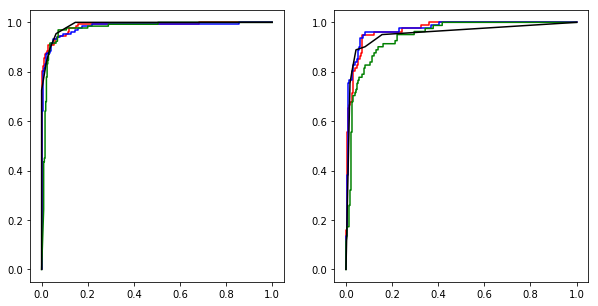

In [48]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import roc_curve, roc_auc_score

classifier_names = ['logistic','lda','qda','knn']
classifiers = [
        LogisticRegression(),
        LinearDiscriminantAnalysis(),
        QuadraticDiscriminantAnalysis(),
        KNeighborsClassifier(5)]

col = ['r','b','g','k']
fig,ax = plt.subplots(1,2,figsize=(10,5))

err = np.zeros((4,2))
auc = np.zeros((4,2))
for i in range(len(classifiers)):
    f = classifiers[i].fit(xtrain,ytrain)
    yhat_train_prob = f.predict_proba(xtrain)
    yhat_test_prob = f.predict_proba(xtest)
    err[i,0] = f.score(xtrain,ytrain)
    err[i,1] = f.score(xtest,ytest)
    auc[i,0] = roc_auc_score(ytrain,yhat_train_prob[:,1])
    auc[i,1] = roc_auc_score(ytest,yhat_test_prob[:,1])
    fpr,tpr,th = roc_curve(ytrain,yhat_train_prob[:,1])
    ax[0].plot(fpr,tpr,col[i])    
    fpr,tpr,th = roc_curve(ytest,yhat_test_prob[:,1])
    ax[1].plot(fpr,tpr,col[i])
    print('train score =[%.2f], test score=[%.2f]' %(err[i,0],err[i,1]))
    print('train auc =[%.2f], test auc=[%.2f]' %(auc[i,0],auc[i,1]))
    print()
   
#ax[0].set_title('Training Set')
#ax[1].set_title('Test Set')
#plt.show()

In [50]:
err

array([[0.94849785, 0.92604502],
       [0.93991416, 0.92926045],
       [0.91845494, 0.89710611],
       [0.94420601, 0.93890675]])

In [70]:
#result[0,:] = ['Score_Train','Score_Test','AUC_Train','AUC_Test']
result[1:3] = err
result[3:] = auc

In [73]:
X.head()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [74]:
type(err)

numpy.ndarray

In [89]:
df = pd.read_csv('data06_iris.csv')
train_idx = np.array(np.arange(0,30).tolist()+np.arange(50,80).tolist())
test_idx = np.array(np.arange(30,50).tolist()+np.arange(80,100).tolist())
xtrain = df.iloc[train_idx,:-1]
ytrain = df.iloc[train_idx,-1]
xtest = df.iloc[test_idx,:-1]
ytest = df.iloc[test_idx,-1]

In [95]:
#simple code
f = LinearDiscriminantAnalysis()
f.fit(xtrain,ytrain)
f.score(xtrain,ytrain)
s = cross_val_score(f,xtrain,ytrain, cv=5)
s.mean() #5-fold CV score
f.score(xtest,ytest) # test score
print(f.score(xtrain,ytrain), s.mean(), f.score(xtest,ytest))

0.8333333333333334 0.8166666666666667 0.7


In [91]:
#simple code
f = LogisticRegression()
f.fit(xtrain,ytrain)
f.score(xtrain,ytrain)
s = cross_val_score(f,xtrain,ytrain, cv=5)
s.mean() #5-fold CV score
f.score(xtest,ytest) # test score
print(f.score(xtrain,ytrain), s.mean(), f.score(xtest,ytest))

0.85 0.8166666666666667 0.625


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

In [92]:
#simple code
f = QuadraticDiscriminantAnalysis()
f.fit(xtrain,ytrain)
f.score(xtrain,ytrain)
s = cross_val_score(f,xtrain,ytrain, cv=5)
s.mean() #5-fold CV score
f.score(xtest,ytest) # test score
print(f.score(xtrain,ytrain), s.mean(), f.score(xtest,ytest))

0.8333333333333334 0.8166666666666667 0.65


In [93]:
?LinearDiscriminantAnalysis